In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from plote_price import plotPrice
from plote_Price_SMA import plotPriceAndSMA
from plote_MACD import plotMACD
from plote_RSI import plotRSI
# In AAPL.ipynb
from stock_data import StockData
# Make plots a bit nicer
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (12, 6)


## Load or download a data (AAPL)

In [12]:
# ============================================
# Download AAPL daily data for a year
# ============================================

ticker = "AAPL"

aapl_stock = StockData("AAPL", start_date="2020-01-01", end_date="2023-12-29")

df = aapl_stock.load_data()
df.head()



C:\Users\Birhanu Matebe\Downloads\KAIM\Finanicial-Data-Analysis\Financial-Data-Analysis\src\stock_data.py:31: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.df = yf.download(


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200


# 1. Data profiling

In [13]:
# ============================================
# Clean the columns (handle MultiIndex case)
# ============================================

# If columns are MultiIndex (like: ('Close', 'TSLA')), flatten them

if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)  # keep only first level: Open, High, etc.

print("Cleaned columns:", df.columns.tolist())

# Optional: add a Ticker column (useful if using multiple tickers later)
df["Ticker"] = ticker

# Ensure index is datetime and sorted
df.index = pd.to_datetime(df.index)
df = df.sort_index()




Cleaned columns: ['Close', 'High', 'Low', 'Open', 'Volume']


# - Summary Statistics 

In [14]:


aapl_stock.inspect_data()




📌 Dataset Shape for AAPL: (1005, 6)

📌 First 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2020-01-02,72.468262,72.528582,71.223259,71.476600,135480400,AAPL
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800,AAPL
2020-01-06,72.335556,72.374162,70.634539,70.885472,118387200,AAPL
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000,AAPL
2020-01-08,73.153503,73.455103,71.698589,71.698589,132079200,AAPL



📌 Last 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2023-12-21,192.858627,195.236183,191.689674,194.265356,46482500,AAPL
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600,AAPL
2023-12-26,191.243881,192.076019,191.025938,191.798640,28919300,AAPL
2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700,AAPL
2023-12-28,191.768921,192.838819,191.362753,192.323679,34049900,AAPL



📌 Random 5 rows:


Price,Close,High,Low,Open,Volume,Ticker
Date,,,,,,
2021-07-06,138.691513,139.795019,136.787218,136.787218,108181800,AAPL
2022-06-10,134.681183,138.246349,134.612426,137.774925,91437900,AAPL
2021-01-08,128.544388,129.108992,126.772697,128.914290,105158200,AAPL
2021-01-11,125.555870,126.714281,125.088617,125.760302,100384500,AAPL
2020-11-18,114.896576,116.639056,114.867374,115.461180,76322100,AAPL



📌 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2020-01-02 to 2023-12-28
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1005 non-null   float64
 1   High    1005 non-null   float64
 2   Low     1005 non-null   float64
 3   Open    1005 non-null   float64
 4   Volume  1005 non-null   int64  
 5   Ticker  1005 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 55.0+ KB


In [15]:




aapl_stock.check_missing_values()




📌 Missing values per column:
Price
Close     0
High      0
Low       0
Open      0
Volume    0
Ticker    0
dtype: int64

📌 Columns with >5% missing values:
✔️ None

📌 Total rows with missing values in key columns ['Close', 'Open', 'High', 'Volume']: 0
✔️ No missing rows in key columns

📌 Duplicate rows: 0

📌 Cardinality (categoricals): {'Ticker': 1}


In [16]:
# log statistical data values
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
Price        Close         High          Low         Open        Volume
count  1005.000000  1005.000000  1005.000000  1005.000000  1.005000e+03
mean    138.034702   139.516777   136.403033   137.903060  9.900973e+07
std      33.364288    33.484119    33.223437    33.355633  5.439416e+07
min      54.264336    55.263186    51.420157    55.161608  2.404830e+07
25%     120.464714   121.718807   118.965608   120.605525  6.412010e+07
50%     142.940979   144.480342   141.249102   142.793654  8.478430e+07
75%     163.345612   165.620836   162.026383   163.585282  1.155416e+08
max     196.256561   197.752429   195.156944   196.167407  4.265100e+08


In [17]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
Price  Ticker
count    1005
unique      1
top      AAPL
freq     1005


In [18]:
# log and check the frequency, and uniqueness of all dataset column
print("The description of all columns:")
print(df.describe(include='all'))


The description of all columns:
Price         Close         High          Low         Open        Volume  \
count   1005.000000  1005.000000  1005.000000  1005.000000  1.005000e+03   
unique          NaN          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN          NaN           NaN   
mean     138.034702   139.516777   136.403033   137.903060  9.900973e+07   
std       33.364288    33.484119    33.223437    33.355633  5.439416e+07   
min       54.264336    55.263186    51.420157    55.161608  2.404830e+07   
25%      120.464714   121.718807   118.965608   120.605525  6.412010e+07   
50%      142.940979   144.480342   141.249102   142.793654  8.478430e+07   
75%      163.345612   165.620836   162.026383   163.585282  1.155416e+08   
max      196.256561   197.752429   195.156944   196.167407  4.265100e+08   

Price  Ticker  
count    1005  
unique      1  
top    

In [19]:
#check if duplication of rows exist
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 0


In [20]:
# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Cardinality (categoricals): {'Ticker': 1}


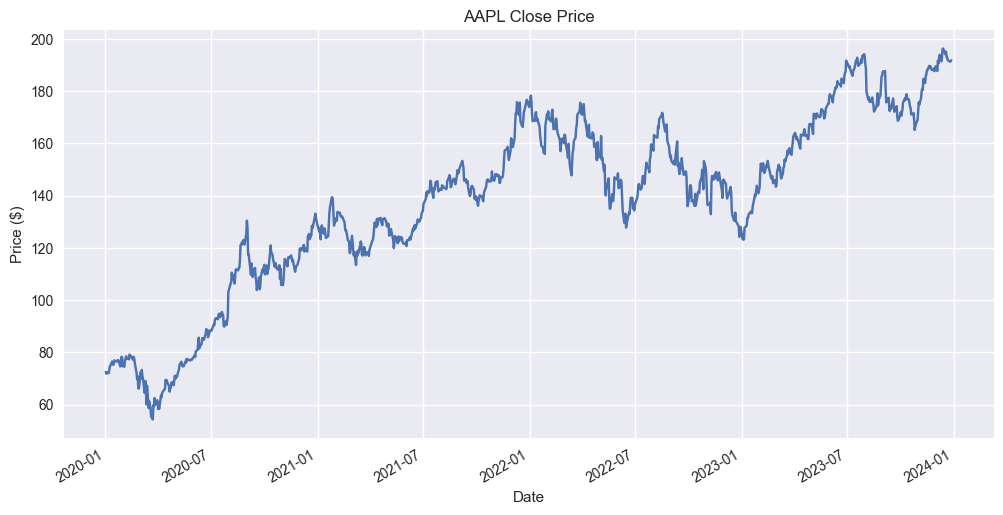

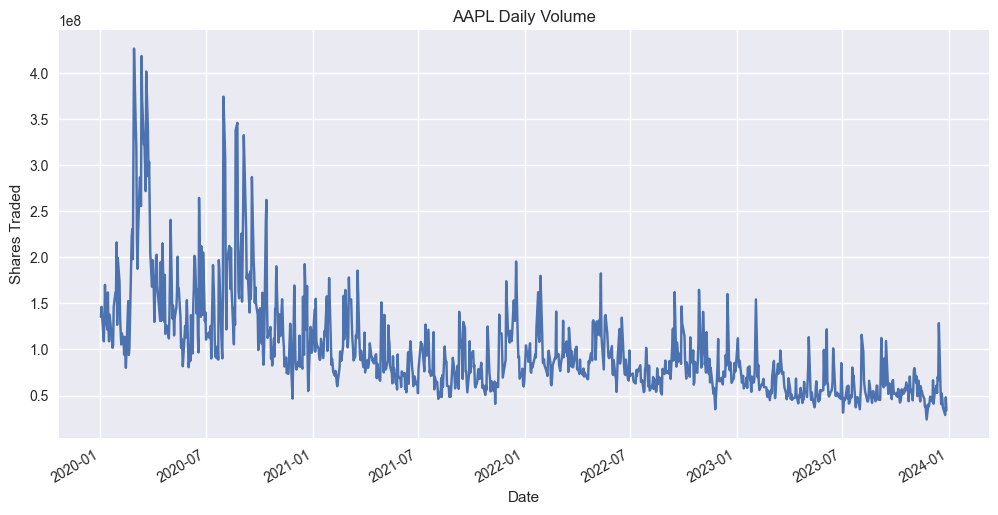

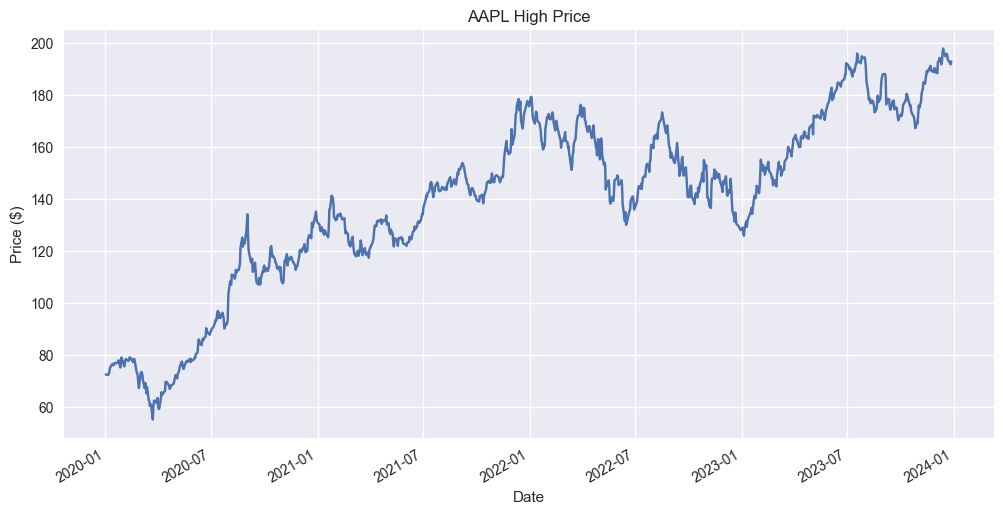

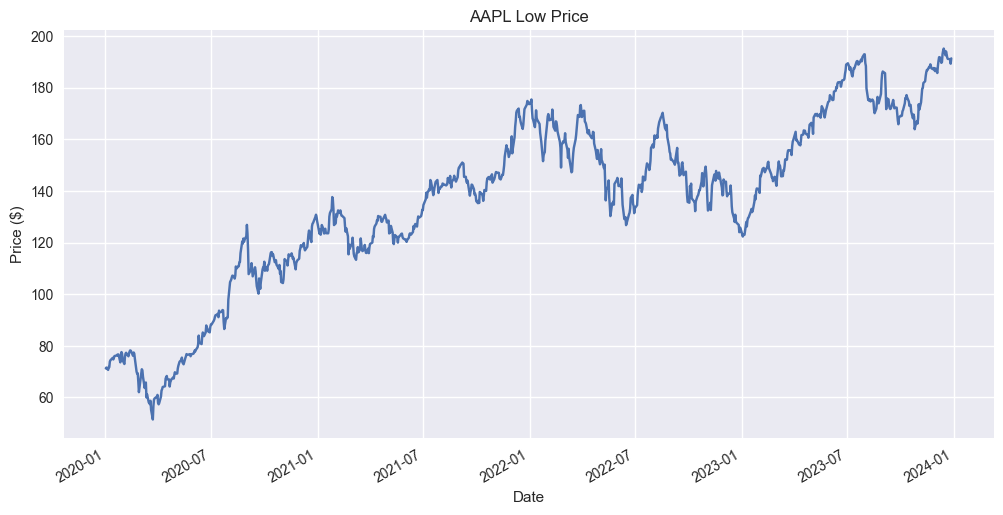

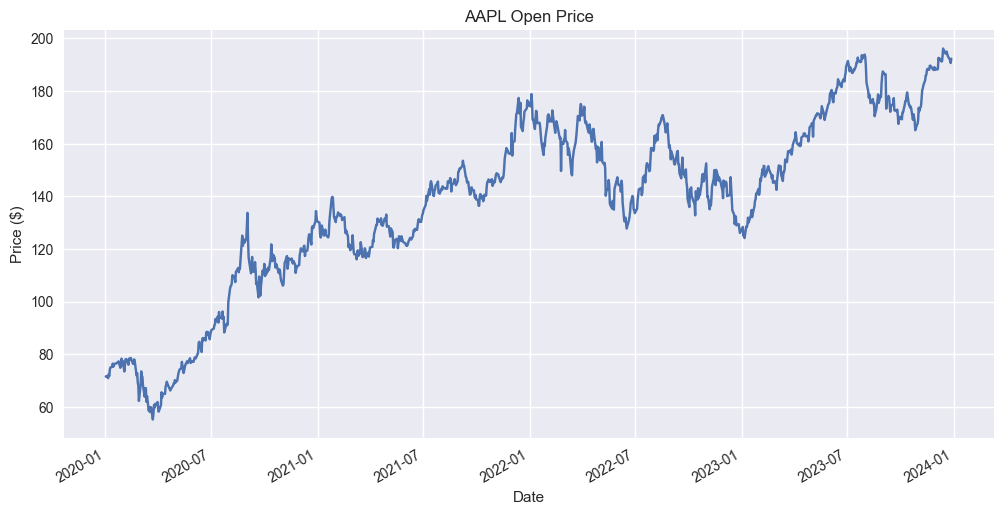

In [21]:

aapl_stock.plot_price()

## Stock price over time

## Long-Term Price Interpretation
Period 1 (2009 - 2017): Steady Growth

- The stock exhibits a consistent upward trend, but the gains are more incremental compared to later years. Price volatility is present, but the overall slope of the line is less steep.

Period 2 (2018 - Late 2019): Accelerating Momentum

- The rate of climb steepens significantly. This period is characterized by stronger moves up, likely driven by continued success in the iPhone cycle, Mac/iPad growth, and the burgeoning Services division (App Store, Apple Music, iCloud, etc.).

Period 3 (Early 2020 - Mid-2021): Explosive, Post-Split Growth

- The Sharp Dip: The rapid, deep, but short-lived decline in early 2020 is the unmistakable impact of the initial COVID-19 market crash.

- The Massive Recovery: This is followed by an almost vertical recovery and subsequent climb, which is a common characteristic among major tech companies during the shift to remote work and digital consumption.

- Stock Split: A major event in this time frame (August 2020) was a 4-for-1 stock split. The chart already reflects the split-adjusted prices, which is why the price point post-2020 looks numerically lower than it would have pre-split, but the climb looks steep.

Period 4 (Mid-2021 - Early 2024): Volatility and New Highs

- The stock price enters a phase of high volatility, characterized by sharp drops (corrections) and strong rallies, but the price continually makes higher lows and higher highs.

- The price is largely in the $125 to $180+ range until it attempts a final breakout near the end of the chart (the recent movement pushing toward $200). This suggests a strong underlying bid from investors, despite macroeconomic headwinds.

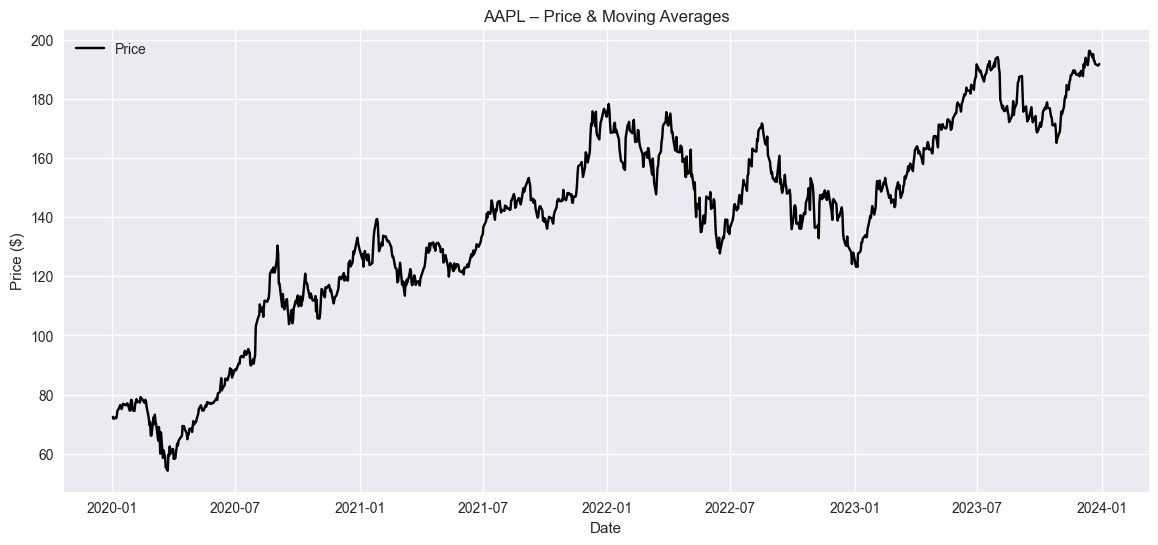

In [22]:
aapl_stock.plot_price_sma()


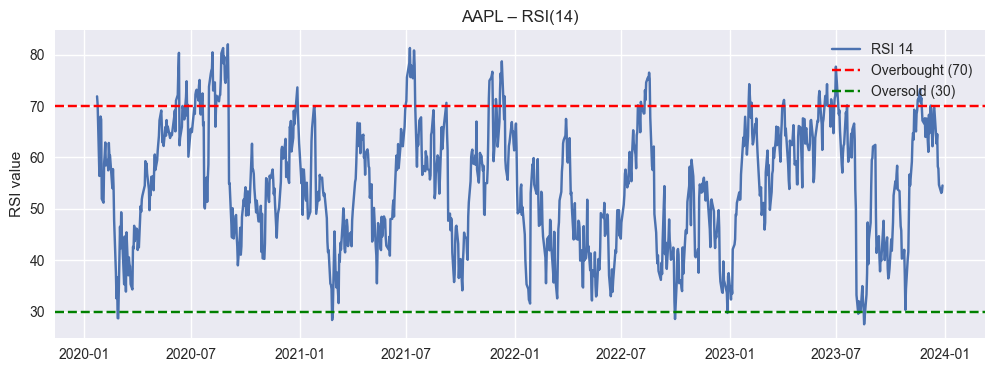

In [23]:



aapl_stock.plot_rsi()



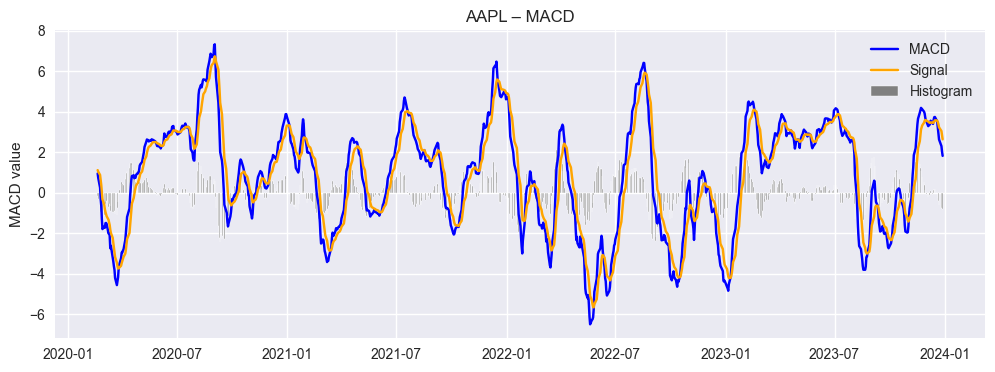

In [24]:
aapl_stock.plot_macd()


## Interpretation of the Moving Averages
- Moving Averages are designed to smooth out price fluctuations, making it easier to see the underlying trend and identify potential turning points.

1. Trend Confirmation
- For the entire 15-year period shown (2009-2024), the relationship between the lines confirms a powerful, sustained uptrend:

- Long-Term Bullish Signal: The 20-day SMA is almost always above the 50-day SMA, and both are almost always below the price. This is a classic configuration for a strong, long-term bull market.

- Support Levels: The moving averages act as dynamic support for the price. When the price pulls back during a rally (e.g., throughout 2017-2018 or during 2023), it often finds support right at the SMA 20 or SMA 50 before resuming its climb.

2. Short-Term vs. Medium-Term Volatility
- SMA 20 (Blue, Dashed): This line tracks the price closely because it is based on only 20 days. It is more reactive to short-term news and volatility.

- SMA 50 (Green, Dotted): This line is smoother and shows the medium-term direction. It is less prone to whipsaws and is often watched by medium-term position traders.

3. Crossover Signals (The Technical Trade Signals)
- The most important signals are generated when the lines cross:

- "Golden Cross" (Bullish): The short-term SMA (20) crosses above the long-term SMA (50). This signals the start of a strong rally.

- Example: Look at the move in mid-2019 leading into 2020. The SMA 20 decisively crosses above the SMA 50, preceding the massive run-up.

- "Death Cross" (Bearish): The short-term SMA (20) crosses below the long-term SMA (50). This signals a loss of momentum and potential downtrend or deep correction.

- Example: The SMA 20 dips below the SMA 50 during the major pullbacks in late 2018 and the first half of 2022. These crossovers correctly identified periods of significant short-term weakness.

# Key Areas of Interest
- The 2020 Crash and Recovery: The initial COVID-19 dip saw the price briefly crash below both SMAs. However, the subsequent recovery was rapid and the SMA 20 quickly crossed back above the SMA 50, confirming that the long-term bullish trend was still intact.

- The 2022 Consolidation: After the massive rally, the price spent much of 2022 and 2023 crossing above and below the SMAs, and the SMA 20 and SMA 50 often crossed each other (a period of "choppy" movement). This confirms the market was in a consolidation phase, where it lacked a clear short-to-medium-term direction, despite the underlying long-term trend remaining positive.

- Current Trend (Late 2023/Early 2024): The price is back up, aggressively moving away from both the SMA 20 and SMA 50, with the SMA 20 clearly above the SMA 50. This indicates a strong, renewed bullish momentum heading into 2024.

## Interpretation of AAPL Relative Strength Index 
- The RSI is a momentum oscillator that measures the speed and change of the stock's closing price movements on a scale of 0 to 100. For Apple, this indicator confirms its status as a powerful, long-term growth stock.

1. Frequent Overbought Signals (RSI > 70) 
The RSI line frequently surges above the 70 line (the red dashed line), especially during the periods of explosive price growth (e.g., 2019-2021 and the push in 2023-2024).

- Significance: For a stock in a strong, sustained bull market like AAPL, a high RSI reading does not usually signal an imminent crash. Instead, it indicates extreme bullish momentum and strong buying conviction. The price has risen aggressively, and the market consensus (the daily closing price) is pushing higher with great speed.

- Result: These overbought periods are typically followed by shallow, short-lived pullbacks (corrections) before the price breaks out to new highs.

2. Rare Oversold Signals (RSI < 30) 
The RSI line rarely, if ever, touches or drops below the 30 line (the green dashed line).

- Significance: Oversold conditions are almost non-existent for Apple. The only times the RSI dipped deeply toward 30 historically coincided with major, fear-driven market events (like the 2020 crash).

- Result: The quick snap-back from these rare lows demonstrates immense underlying strength. The market immediately reverses any extreme selling pressure, validating that these low-RSI moments were excellent long-term buying opportunities.

3. The Neutral Zone (40–50 Range) 
When the stock's rally pauses, the RSI typically falls to the 40–50 level and finds support there, rather than dropping lower.

- Significance: In an uptrend, the 40-50 area acts as a bullish support level. This means that when investors sell their short-term gains, their selling pressure is quickly absorbed by the next wave of buyers, preventing the stock from losing its underlying positive momentum.

- In summary, the RSI confirms that Apple is a momentum-driven stock that consistently sees buying enthusiasm (high RSI) without experiencing extended periods of fear or weakness (low RSI).

## Interpretation of AAPL MACD
- The MACD confirms the conclusions drawn from the previous charts but adds specific insight into the momentum shifts that drive the long-term price action.

1. Trend Confirmation via the Zero Line
Overwhelmingly Bullish: For the vast majority of the 15-year period (2009-2024), the entire MACD formation (both the MACD Line and the Signal Line) is positioned above the Zero Line.

- Significance: When the MACD is above zero, it means the short-term momentum (12-period EMA) is faster than the medium-term momentum (26-period EMA). This is the definition of a strong, established uptrend. The closing price is continually accelerating upward.

2. Crossover Signals: Buy/Sell Triggers
- The most important signals are the crossovers between the MACD Line and the Signal Line:

- Buy Signal (MACD crosses ABOVE Signal Line): This crossover marks an increase in bullish momentum. You can see these crossovers repeatedly initiating the major rallies that push the closing price to new highs.

- Sell Signal (MACD crosses BELOW Signal Line): This crossover marks a slowdown or reversal of bullish momentum. These signals typically align with the price consolidations or pullbacks seen in the main chart (e.g., the deeper corrections in 2018-2019 and 2022).

3. Strength of Momentum via Divergence
- The distance between the MACD Line and the Signal Line indicates the strength of the price movement:

- Strong Rallies: During periods of sharp price increases (like 2019-2021), the MACD Line rapidly pulls far away from the Signal Line. This divergence shows the closing price momentum is extremely powerful.

- Momentum Loss: Before major price tops, the MACD Lines often converge (move closer together) or show divergence (price makes a new high, but the MACD makes a lower high). This is a strong warning sign that the momentum driving the closing price is weakening, even if the price itself is still grinding higher.